In [3]:
cd ElectricBrainSignals-main

/Users/susannedahle/Documents/Master/ElectricBrainSignals-main


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from brainsignals.plotting_convention import mark_subplots, simplify_axes
import matplotlib.gridspec as gridspec

<>:79: SyntaxWarning: invalid escape sequence '\i'
<>:79: SyntaxWarning: invalid escape sequence '\i'
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_40933/1643775561.py:79: SyntaxWarning: invalid escape sequence '\i'
  ax2.plot(frequencies, lambda_ac_inf / np.max(lambda_ac_inf), label="$\infty$")


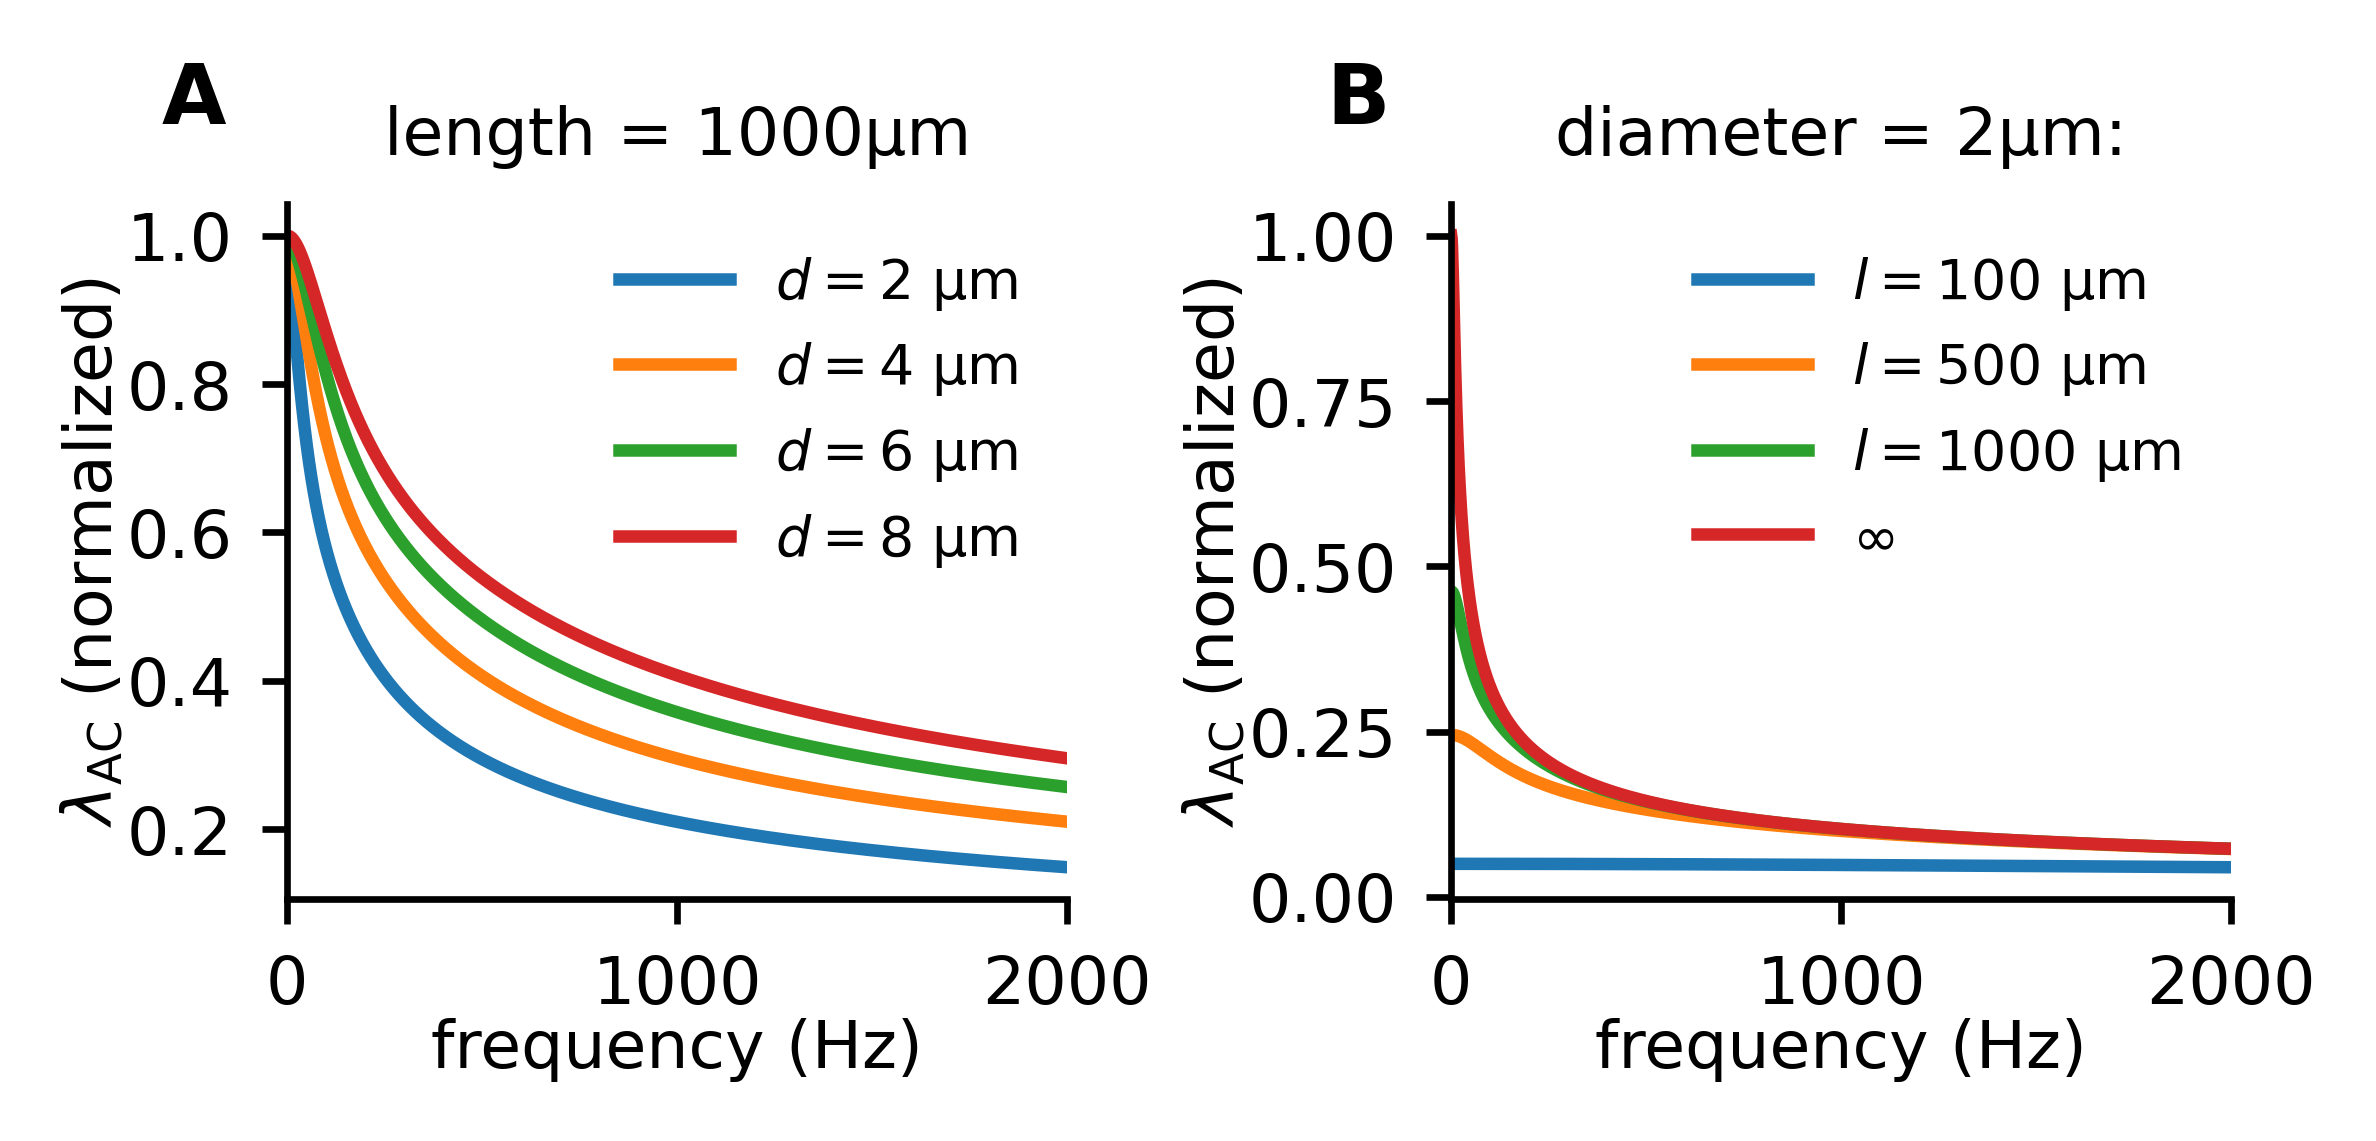

In [7]:
# Constants
d_fixed = 2e-6  # constant diameter for ax2
R_m = 3e4 * 1e-4  # Ohm cm² -> Ohm m²
R_i = 150 * 1e-2  # Ohm cm -> Ohm m
C_m = 1 * 1e-2  # uF / cm² -> F / m²

frequencies = np.arange(2001)
omegas = 2 * np.pi * frequencies
tau = R_m * C_m
s = np.sqrt(1 + 1j * omegas * tau)

# lambda_inf: used for normalization in ax2
lambda_0 = np.sqrt(d_fixed * R_m / (4 * R_i))
lambda_ac_inf = lambda_0 * np.sqrt(2 / (1 + np.sqrt(1 + (omegas * tau)**2)))

def return_abs_H(s_, z_, l=1, d=2e-6):
    lambda_0 = np.sqrt(d * R_m / (4 * R_i))
    exp_1 = 2 * s_ * l / lambda_0
    exp_2 = s_ * z_ / lambda_0

    if exp_1 > 30:
        term1 = 0 + 0j
    else:
        term1 = np.exp(+exp_2) / (1 + np.exp(exp_1))
    term2 = np.exp(-exp_2) / (1 + np.exp(-exp_1))

    H = np.pi * s_**2 * d / R_m * (term1 + term2)
    return np.abs(H)

def return_abs_H_matrix(s, z, l, d):
    H = np.zeros((len(z), len(s)), dtype=complex)
    for s_idx in range(len(s)):
        H[:, s_idx] = return_abs_H(s[s_idx], z, l, d)
    return H

# Plotting
fig = plt.figure(figsize=(4, 2))  # wider figure to accommodate third panel
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig.subplots_adjust(bottom=0.18, wspace=0.4, left=0.12, top=0.95)

# ax1: Top-left
ax1 = fig.add_subplot(gs[0, 0], xlabel="frequency (Hz)", xlim=[0, 2000], 
                      ylabel=r"$\lambda_{\rm AC}$ (normalized)", title = "length = 1000µm" )

# ax2: Middle
ax2 = fig.add_subplot(gs[0, 1], xlim=[0, 2000], xlabel="frequency (Hz)", 
                      ylabel=r"$\lambda_{\rm AC}$ (normalized)", title = "diameter = 2µm:")


# ax1: Different diameters, fixed length ----
ds = [2e-6, 4e-6, 6e-6, 8e-6]
lambda_acs_diams = []

for d in ds:
    z_ = np.linspace(0, 1e-3, 1000)  # fixed length = 1mm
    H_abs = return_abs_H_matrix(s, z_, 1e-3, d)
    lambda_ac = np.abs(np.trapz(z_[:, None] * H_abs, z_, axis=0) / np.trapz(H_abs, z_, axis=0))
    lambda_acs_diams.append(lambda_ac)

max_lambda_ac_8um = np.max(lambda_acs_diams[-1])  # 8 µm is last in list

for lambda_ac, d in zip(lambda_acs_diams, ds):
    ax1.plot(frequencies, lambda_ac / max_lambda_ac_8um, label=f"$d=${d*1e6:.0f} µm")

ax1.legend(frameon=False, loc = 'upper right', fontsize = 'small')

# ax2: Different lengths, fixed diameter ----
ls = [0.1e-3, 0.5e-3, 1.0e-3]
lambda_acs_lens = []

for l in ls:
    z_ = np.linspace(0, l, 1000)
    H_abs = return_abs_H_matrix(s, z_, l, d_fixed)
    lambda_ac = np.abs(np.trapz(z_[:, None] * H_abs, z_, axis=0) / np.trapz(H_abs, z_, axis=0))
    lambda_acs_lens.append(lambda_ac)
    ax2.plot(frequencies, lambda_ac / np.max(lambda_ac_inf), label=f"$l=${l*1e6:.0f} µm")

# Add lambda_inf
ax2.plot(frequencies, lambda_ac_inf / np.max(lambda_ac_inf), label="$\infty$")
ax2.legend(frameon=False, loc = 'upper right', fontsize = 'small')

simplify_axes([ax1, ax2])
mark_subplots([ax1, ax2], ["A", "B"])

plt.tight_layout()
fig.savefig("/Users/susannedahle/Documents/Master/Code/Results_simp_neur/intrinsic_dend_filt.png")
plt.show()
